# Classification using logistic regression
For this exercise we'll be using [scikit-learn](https://scikit-learn.org/stable/). This is great library/module for predictive data analysis in Python. It's got a huge library of algorithms and models, from standard linear models like regression, to Support Vector Machines, Decision Trees, and Neural Networks. We'll start with logistic regression.

## Normalization of image data
When working with images in machine learning, it's common to apply some kind of normalization to the pixel values.
One of the common ways to normalize image data is to scale the values to the [0, 1] interval. This is what we will do here,
using min-max scaling.
Min-max scaling preserves the shape of the distribution, so that the difference between each image in
a set of images is also preserved. In doing so, we are assuming that this property in the data is important,
but keep in mind that it is something we can change, should we want to.
Min-max scaling is calculated as
$$\text{scaled image} = \frac{\text{image} - \mu_{image}}{I_{max} - I_{min}},$$
where $I_{max}$ and $I_{min}$ refer to the maximum and minimum pixel intensity,
and $\mu_{image}$ is the mean pixel intensity for the set of images.

We'll implement this as a function `normalize_image_data()`.
However, we're not going to use it quite yet. We won't apply normalization to the data before we've split it into
a training set and a validation set. If we normalize the entire dataset, then split it, we've techinically
included properties of the validation set in the training set. This can give you a false picture of how well
your model is performing, and should be avoided.

Note that sklearn has a function for this too, an entire library for data preprocessing, actually.
Check it out [here](https://scikit-learn.org/stable/modules/preprocessing.html).\
We're also going to save this normalization function to a separate python file called `helper_functions.py`.
That way, we don't need to define it in every single notebook we make. We can just import it from that file.

## Numpy approach

In [15]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
# Define the normalization function
def normalize_image_data(images):
    """ Takes an imported set of images and normalizes values to between
    0 and 1 using min-max scaling across the whole image set.
    """
    img_term = np.amax(images) - np.amin(images)
    img_mean = np.mean(images)
    images = (images - img_mean) / img_term
    return images

In [5]:
# Load images and labels.
DATA_PATH = "../data/"

images = np.load(DATA_PATH+"images_training.npy")
labels = np.load(DATA_PATH+"labels_training.npy")

# Split the training indices into training and validation. 
# Validate with 25% of the data (default). Can be adjusted.
x_idx = np.arange(images.shape[0])
train_idx, val_idx, not_used1, not_used2 = train_test_split(x_idx, x_idx, test_size = 0.25)

### Fit to the training data
The documentation for the LogistigRegression class is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

We'll start off with the default settings for the algorithm, and once we've got everything working we'll take a look
at tuning the *hyperparameters*.

Recall the shape of the images we stored in the data_import_exploration notebook. It's (n_images, 16, 16), but the regression
class expect a vector, so to input them we need to reshape the array again.

In [6]:
images = images.reshape(images.shape[0], 256)

In [7]:
# Init logreg class and fit to the training data.
logreg = LogisticRegression()

# We pass normalized image data to the function.
logreg.fit(normalize_image_data(images[train_idx]), labels[train_idx])

LogisticRegression()

### Evaluate the model

In [8]:
# Evaluate on validation data. score() returns the mean accuracy on the provided validation data and labels
acc = logreg.score(normalize_image_data(images[val_idx]), labels[val_idx])
print(acc)

0.7266666666666667


In [11]:
pred = logreg.predict(normalize_image_data(images[val_idx]))

## Confusion Matrix
The confusion matrix can be a useful metric to gain a little bit
more insight into specifically what the model gets wrong.
* Top left: Single events classified as single events
* Top right: Single events classified as double events
* Bottom left: Double events classified as single events
* Bottom right: Double events classified as double events

In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
# Convert sigmoid values from prediction to integers so it works with the function.

result = pred > 0.5
confusion_matrix(labels[val_idx], result)

array([[814, 296],
       [319, 821]])

## F1 Score

In [13]:
from sklearn.metrics import f1_score
score = f1_score(labels[val_idx], result)
print("F1-score: ", score)

F1-score:  0.7275143996455472


## ROC-curve and Area Under Curve

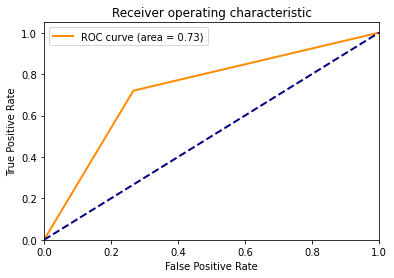

In [16]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(labels[val_idx], pred)
roc_auc = auc(fpr, tpr)
# Plot the curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (area = {:0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()